For 4 coin flips:
Average longest streak: 2.37
Variance of Longest Streak: 0.75
Standard Error: 0.03

For 8 coin flips:
Average longest streak: 3.36
Variance of Longest Streak: 1.69
Standard Error: 0.04

For 16 coin flips:
Average longest streak: 4.35
Variance of Longest Streak: 2.15
Standard Error: 0.05

For 32 coin flips:
Average longest streak: 5.34
Variance of Longest Streak: 2.91
Standard Error: 0.05

For 64 coin flips:
Average longest streak: 6.32
Variance of Longest Streak: 3.01
Standard Error: 0.05

For 256 coin flips:
Average longest streak: 8.39
Variance of Longest Streak: 3.76
Standard Error: 0.06

For 512 coin flips:
Average longest streak: 9.26
Variance of Longest Streak: 3.13
Standard Error: 0.06

For 1024 coin flips:
Average longest streak: 10.33
Variance of Longest Streak: 3.37
Standard Error: 0.06



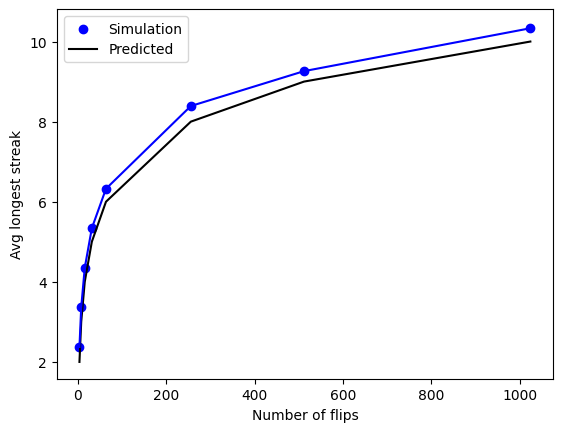

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

N = 1000  # Number of simulations
n_values = [4, 8, 16, 32,64,256,512,1024]  # Different numbers of coin flips in each simulation
av_long_streak_list = []

for n in n_values:
  longest_streaks_list = []


  for simulation in range(N):
        longest_heads = 0
        longest_tails = 0
        current_heads = 0
        current_tails = 0
        longest_streak = 0

        for i in range(n):
            result = "Heads" if random.random() < 0.5 else "Tails"

            if result == "Heads":
                current_heads += 1
                current_tails = 0
            else:
                current_tails += 1
                current_heads = 0

            longest_heads = max(longest_heads, current_heads)
            longest_tails = max(longest_tails, current_tails)
            longest_streak = max(longest_heads, longest_tails)


        longest_streaks_list.append(longest_streak)

  av_longest_streak = sum(longest_streaks_list) / N
  av_long_streak_list.append(av_longest_streak)




  #variance and standard error
  variance = sum((x - av_longest_streak) ** 2 for x in longest_streaks_list) / N
  stderr = np.sqrt(variance/N)
  prediction = np.array([np.log2(n) for n in n_values])
  print(f"For {n} coin flips:")
  print(f'Average longest streak: {av_longest_streak:.2f}')
  print(f"Variance of Longest Streak: {variance:.2f}")
  print(f'Standard Error: {stderr:.2f}')
  print()

#plot
plt.errorbar(n_values, av_long_streak_list, yerr = stderr, fmt = '', color = 'b')
plt.scatter(n_values, av_long_streak_list, color ='b', label = "Simulation")
plt.plot(n_values, prediction, color ='k', label = "Predicted")
plt.legend()
plt.xlabel("Number of flips")
plt.ylabel("Avg longest streak")
plt.show()